EN2550 Assignment 1
Index : 190557V
Name : K.G.C.P.Sandaruwan

Question (1)

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'look up table')

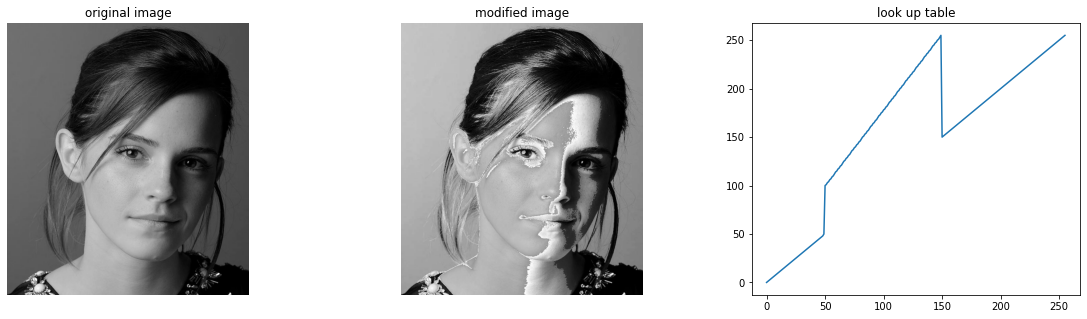

In [20]:
emma=cv.imread("emma_gray.jpg")
assert emma is not None
t1 = np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)
table=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
#modified=cv.LUT(emma,table)
emma=cv.cvtColor(emma,cv.COLOR_BGR2RGB)
modified=cv.LUT(emma,table)
modified=cv.cvtColor(modified,cv.COLOR_BGR2RGB)
fig,ax=plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(5)
ax[0].imshow(emma)
ax[0].set_title("original image")
ax[0].axis("off")
ax[1].imshow(modified)
ax[1].set_title("modified image")
ax[1].axis("off")
ax[2].plot(table)
ax[2].set_title("look up table")
 



Question (2)

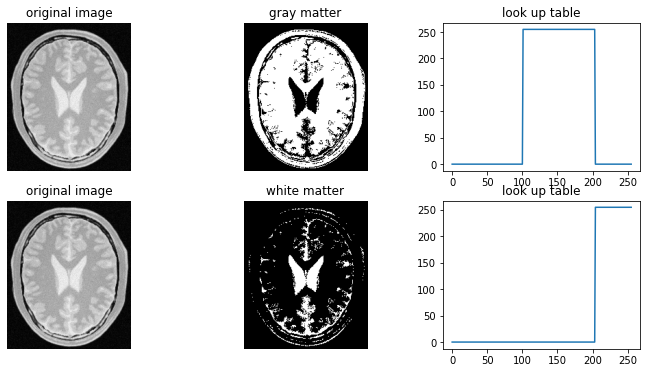

In [16]:
# 101-204 gray matter
# 204-256 white matter
brain=cv.imread("brain_proton_density_slice.png")
brain=cv.cvtColor(brain,cv.COLOR_BGR2RGB)
g1=np.linspace(0,0,101)
g2=np.linspace(255,255,103)
g3=np.linspace(0,0,52)
table_gm=np.concatenate((g1,g2,g3),axis=0).astype(np.uint8)
w1=np.linspace(0,0,204)
w2=np.linspace(255,255,52)
table_wm=np.concatenate((w1,w2),axis=0).astype(np.uint8)
grayMatter=cv.LUT(brain,table_gm)
whiteMatter=cv.LUT(brain,table_wm)
#brain=cv.cvtColor(brain,cv.COLOR_BGR2RGB)
fig,ax=plt.subplots(2,3)
fig.set_figwidth(12)
fig.set_figheight(6)
ax[0][0].set_title("original image")
ax[0][1].set_title("gray matter")
ax[0][0].axis("off")
ax[0][1].axis("off")
ax[0][2].set_title("look up table")
ax[0][0].imshow(brain)
ax[0][1].imshow(grayMatter)
ax[0][2].plot(table_gm)
ax[1][0].set_title("original image")
ax[1][1].set_title("white matter")
ax[1][0].axis("off")
ax[1][1].axis("off")
ax[1][2].set_title("look up table")
ax[1][0].imshow(brain)
ax[1][1].imshow(whiteMatter)
ax[1][2].plot(table_wm) 
plt.show()


Question (3)

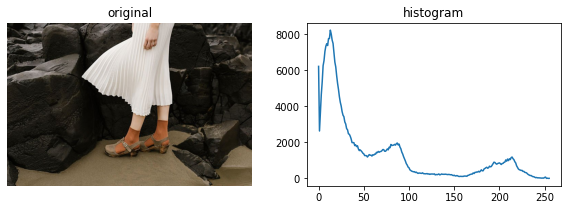

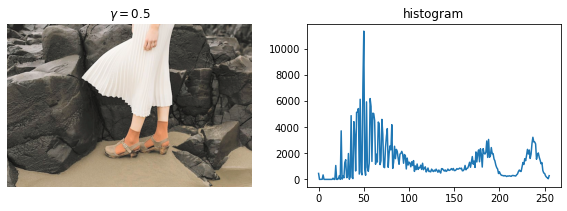

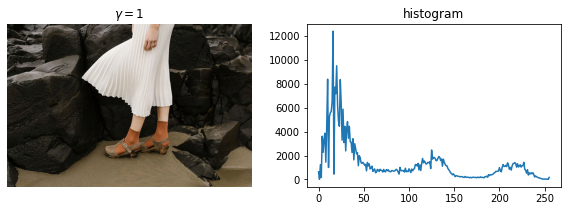

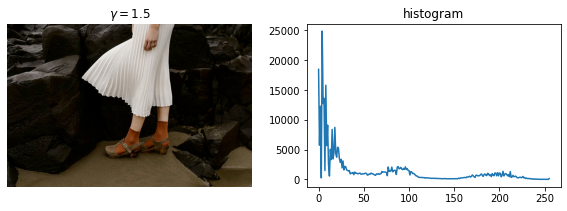

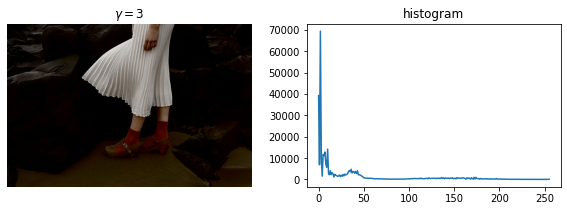

In [13]:
#gamma=3
original=cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert original is not None
original1=cv.cvtColor(original, cv.COLOR_BGR2Lab)
L, a, b = cv.split(original1)
gamma = [0.5, 1, 1.5, 3]
hist1 = cv.calcHist([original], [0], None, [256], [0,256])
fig, ax = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(3)
original=cv.cvtColor(original,cv.COLOR_BGR2RGB)
ax[0].imshow(original)
ax[0].axis("off")
ax[0].set_title("original")
ax[1].plot(hist1)
ax[1].set_title("histogram")

plt.show()
for i in gamma:
    table = np.array([(j/255.0)**(i)*255.0 for j in L]).astype('uint8')

    #t = np.array([(p/255.0)**gamma[i]*(255.0) for p in L]).astype(np.uint8)
    corrected=cv.merge([table,a,b])
    corrected1=cv.cvtColor(corrected, cv.COLOR_Lab2RGB)
    hist2 = cv.calcHist([corrected1], [0], None, [256], [0,256])
    fig, ax = plt.subplots(1,2)
    fig.set_figwidth(10)
    fig.set_figheight(3)
    # ax[0].xaxis.tick_top()
    # ax[1].xaxis.tick_top()
    #ax[0].imshow(original1)
    ax[0].imshow(corrected1)
    ax[0].set_title("$\gamma = $"+ str(i))
    ax[0].axis("off")
    ax[1].plot(hist2)
    ax[1].set_title("histogram")
    plt.show()



Question (4)